In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import glob

glob.glob("data/seoul-covid*.csv")

['data/seoul-covid19-2021-12-26.csv', 'data/seoul-covid19-2021-12-18.csv']

In [5]:
glob.glob("seoul-covid*")

[]

In [7]:

df_01 = pd.read_csv("data/seoul-covid19-2021-12-18.csv")
df_01.shape

(200000, 7)

In [8]:
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [9]:
df_02 = pd.read_csv("data/seoul-covid19-2021-12-26.csv")
df_02.shape

(18646, 7)

In [10]:
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


In [11]:
df_01.shape, df_02.shape

((200000, 7), (18646, 7))

In [12]:
df = pd.concat([df_01, df_02])
df.shape

(218646, 7)

In [13]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [14]:
df.nunique()

연번      218646
환자      218644
확진일        671
거주지         34
여행력        183
접촉력       1417
퇴원현황         2
dtype: int64

In [15]:
df.describe()

,연번,환자
count,218646.000000,218646.000000
mean,109323.500000,322462.160977
std,63117.807816,173903.371149
min,1.000000,2.000000
25%,54662.250000,168409.250000
50%,109323.500000,336181.500000
75%,163984.750000,470149.500000
max,218646.000000,611669.000000


In [16]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
18642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
18643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
18644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN
18645,200001,561831,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [17]:
df[df.duplicated()]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(218646, 7)

In [20]:
df["연번"].nunique()

218646

In [ ]:
df = df.set_index("연번")
df

In [22]:
df = df.sort_index(ascending=False)

In [23]:
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN


In [24]:
df.tail(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


In [25]:
df.shape

(218646, 6)

In [26]:
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [27]:
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [28]:
df.index

Int64Index([218646, 218645, 218644, 218643, 218642, 218641, 218640, 218639,
            218638, 218637,
            ...
                10,      9,      8,      7,      6,      5,      4,      3,
                 2,      1],
           dtype='int64', name='연번', length=218646)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218646 entries, 218646 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      218646 non-null  int64 
 1   확진일     218646 non-null  object
 2   거주지     218646 non-null  object
 3   여행력     218646 non-null  object
 4   접촉력     218646 non-null  object
 5   퇴원현황    163497 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.7+ MB


In [30]:
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    55149
dtype: int64

In [31]:
df.isnull().mean()

환자      0.00000
확진일     0.00000
거주지     0.00000
여행력     0.00000
접촉력     0.00000
퇴원현황    0.25223
dtype: float64

In [32]:
df.describe()

,환자
count,218646.000000
mean,322462.160977
std,173903.371149
min,2.000000
25%,168409.250000
50%,336181.500000
75%,470149.500000
max,611669.000000


In [33]:
df.describe(include="object")

,확진일,거주지,여행력,접촉력,퇴원현황
count,218646,218646,218646,218646,163497
unique,671,34,183,1417,2
top,2021-12-14,송파구,-,기타 확진자 접촉,퇴원
freq,3165,13235,215575,90055,161849


In [34]:
df["확진일"].head(1)

연번
218646    2021-12-26
Name: 확진일, dtype: object

In [35]:
df["확진일"] = pd.to_datetime(df["확진일"])

In [36]:
df["확진일"].head(1)

연번
218646   2021-12-26
Name: 확진일, dtype: datetime64[ns]

In [37]:
df["연도"] = df["확진일"].dt.year
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도
연번,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021


In [38]:
df["월"] = df["확진일"].dt.month
df["일"] = df["확진일"].dt.day
df["요일"] = df["확진일"].dt.dayofweek

In [39]:
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6


In [40]:
df["연도"].astype(str) +"-"+ df["월"].astype(str)

연번
218646    2021-12
218645    2021-12
218644    2021-12
218643    2021-12
218642    2021-12
           ...   
5          2020-1
4          2020-1
3          2020-1
2          2020-1
1          2020-1
Length: 218646, dtype: object

In [41]:

df["연도월"] = df["확진일"].astype(str).str[:7]

In [43]:
df.tail(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01


In [44]:
dayofweek = "월화수목금토일"
dayofweek[0]

'월'

In [45]:

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [46]:
find_dayofweek(1)

'화'

In [47]:
df["요일명"] = df["요일"].map(find_dayofweek)

In [48]:
df["요일명"] = df["요일"].apply(find_dayofweek)

In [49]:
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
62353,1,화
92419,0,월
25988,4,금
202818,6,일
21461,6,일


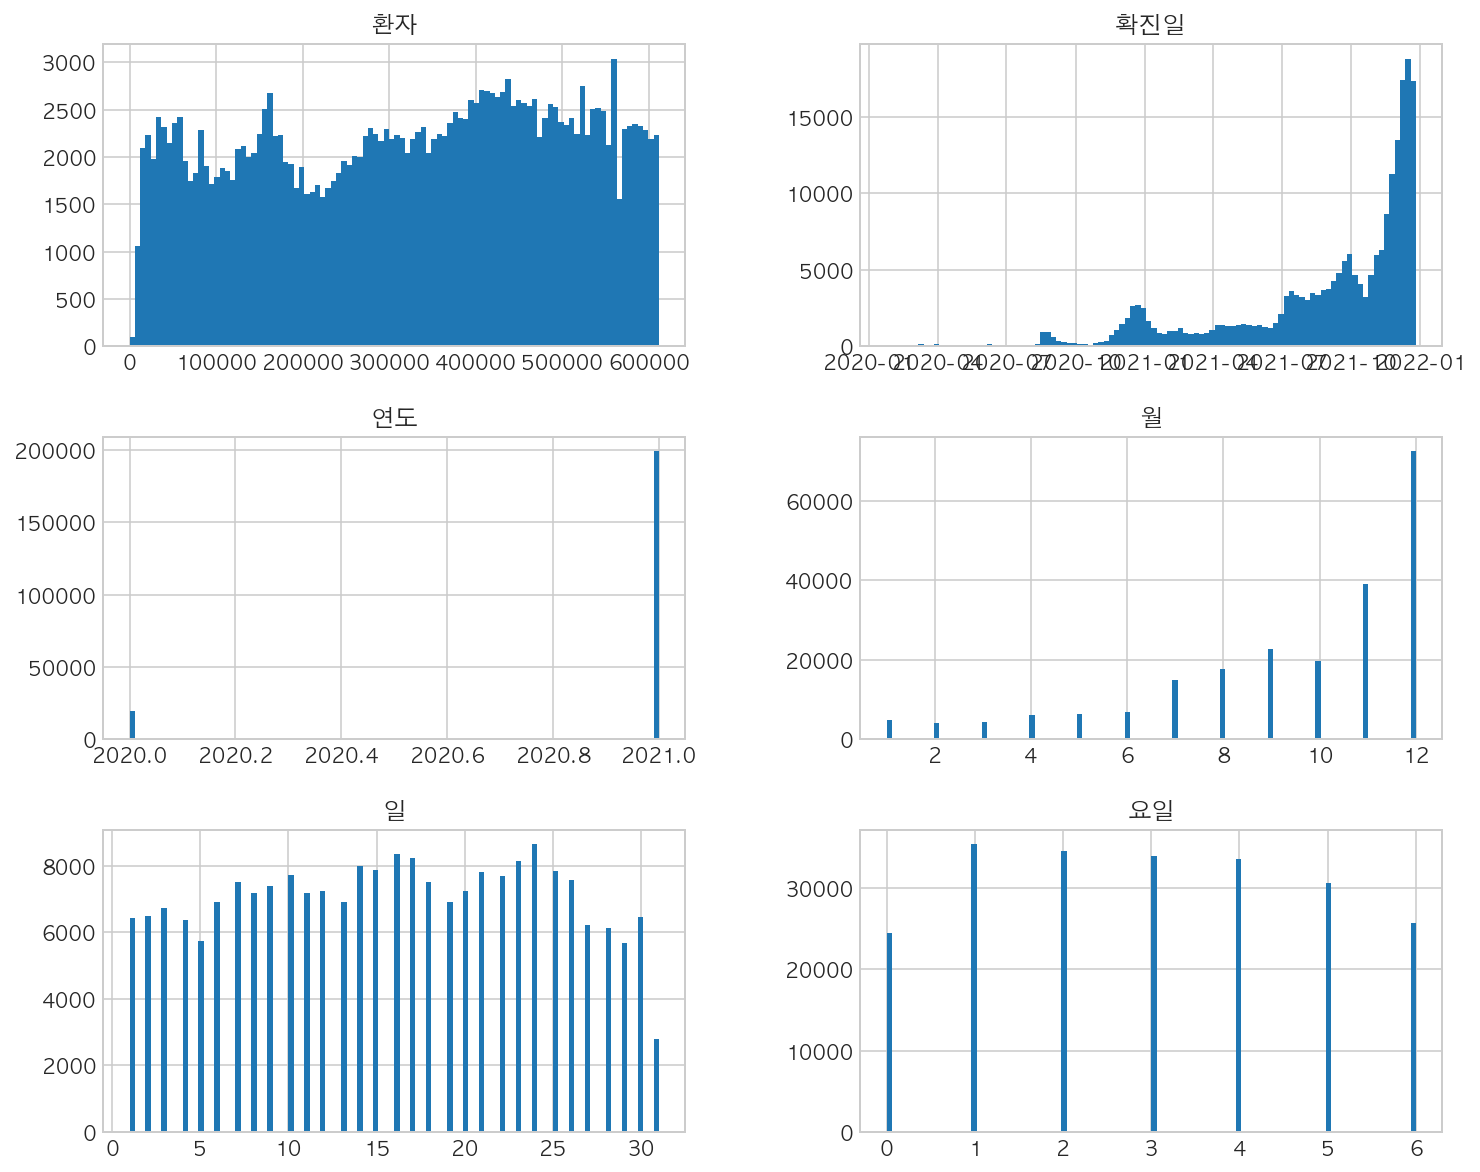

In [50]:
df.hist(figsize=(12, 10), bins=100)
plt.show()

In [51]:
df["연도"].value_counts()

2021    199253
2020     19393
Name: 연도, dtype: int64

In [52]:
df["연도"].value_counts(normalize=True) * 100

2021    91.130412
2020     8.869588
Name: 연도, dtype: float64

In [53]:
year_month = df["연도월"].value_counts().sort_index()
year_month.head(3)

2020-01      7
2020-02     80
2020-03    391
Name: 연도월, dtype: int64

<AxesSubplot:title={'center':'연도월별 확진 수'}>

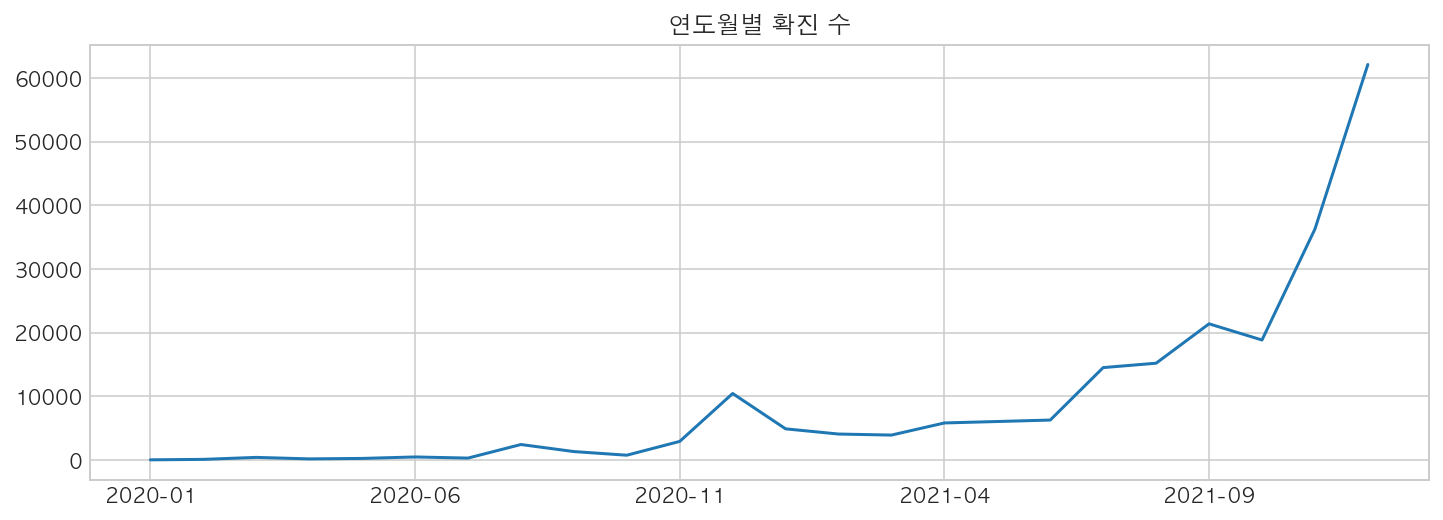

In [54]:
year_month.plot(title="연도월별 확진 수", figsize=(12, 4))

<AxesSubplot:title={'center':'연도월별 확진 수'}>

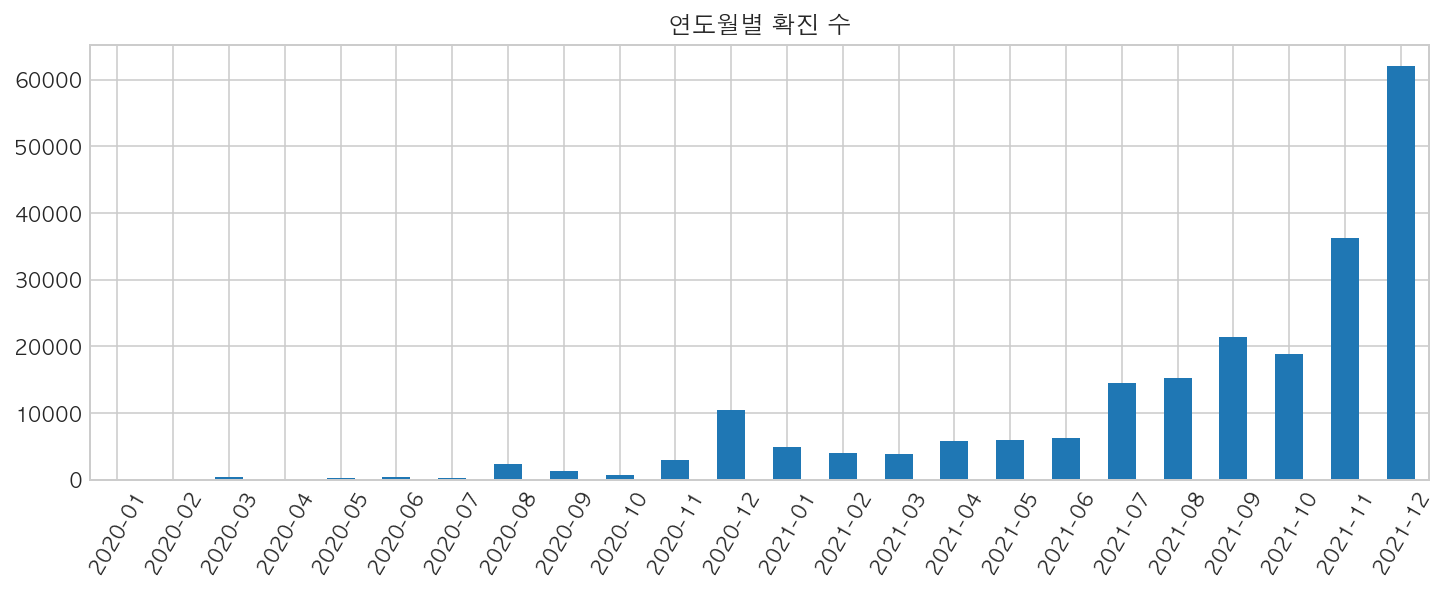

In [55]:
year_month.plot(kind="bar", title="연도월별 확진 수", figsize=(12, 4), rot=60)

In [75]:
weekday_count = df["요일명"].value_counts()
weekday_count

화    35471
수    34548
목    34030
금    33655
토    30692
일    25734
월    24516
Name: 요일명, dtype: int64

In [76]:
weekday_list = [w for w in "월화수목금토일"]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

<AxesSubplot:>

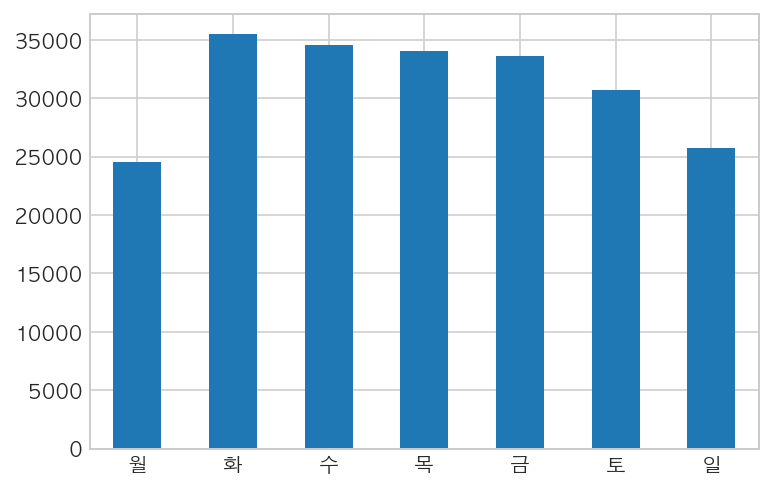

In [79]:

weekday_count[weekday_list].plot.bar(rot=0)

In [83]:

day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-12-22    2719
2021-12-23    2346
2021-12-24    2123
2021-12-25    1917
2021-12-26    1496
Name: 확진일, Length: 671, dtype: int64

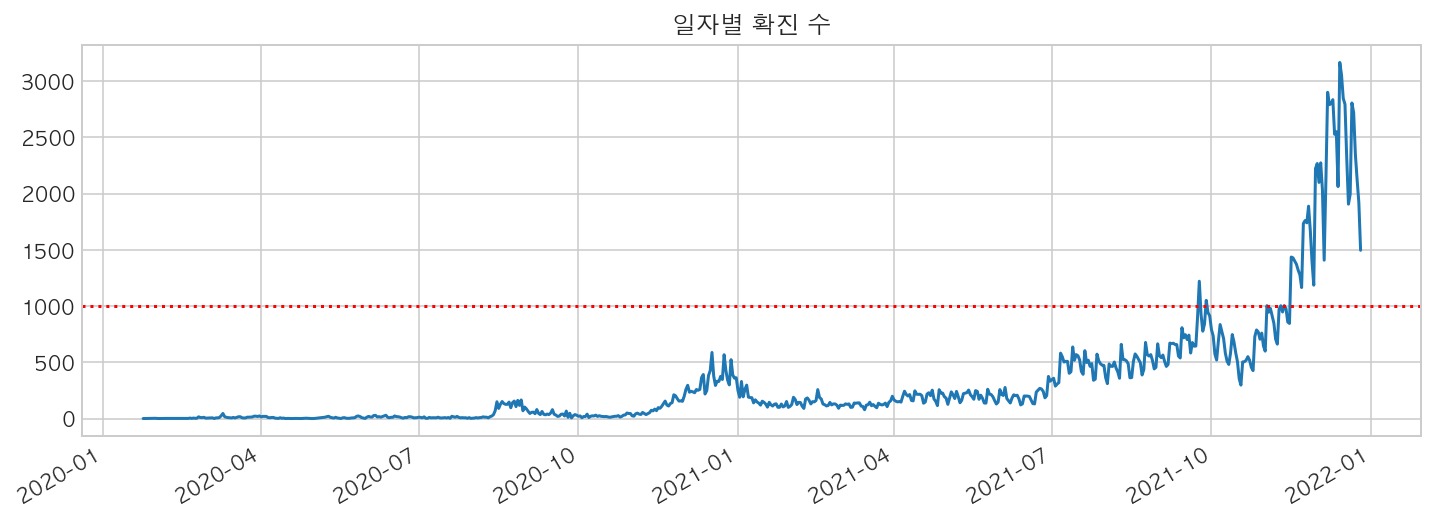

In [109]:
day_count.plot(figsize=(12, 4), title="일자별 확진 수")
plt.axhline(1000, c="r", linestyle=":")

<AxesSubplot:title={'center':'일자별 확진 수'}>

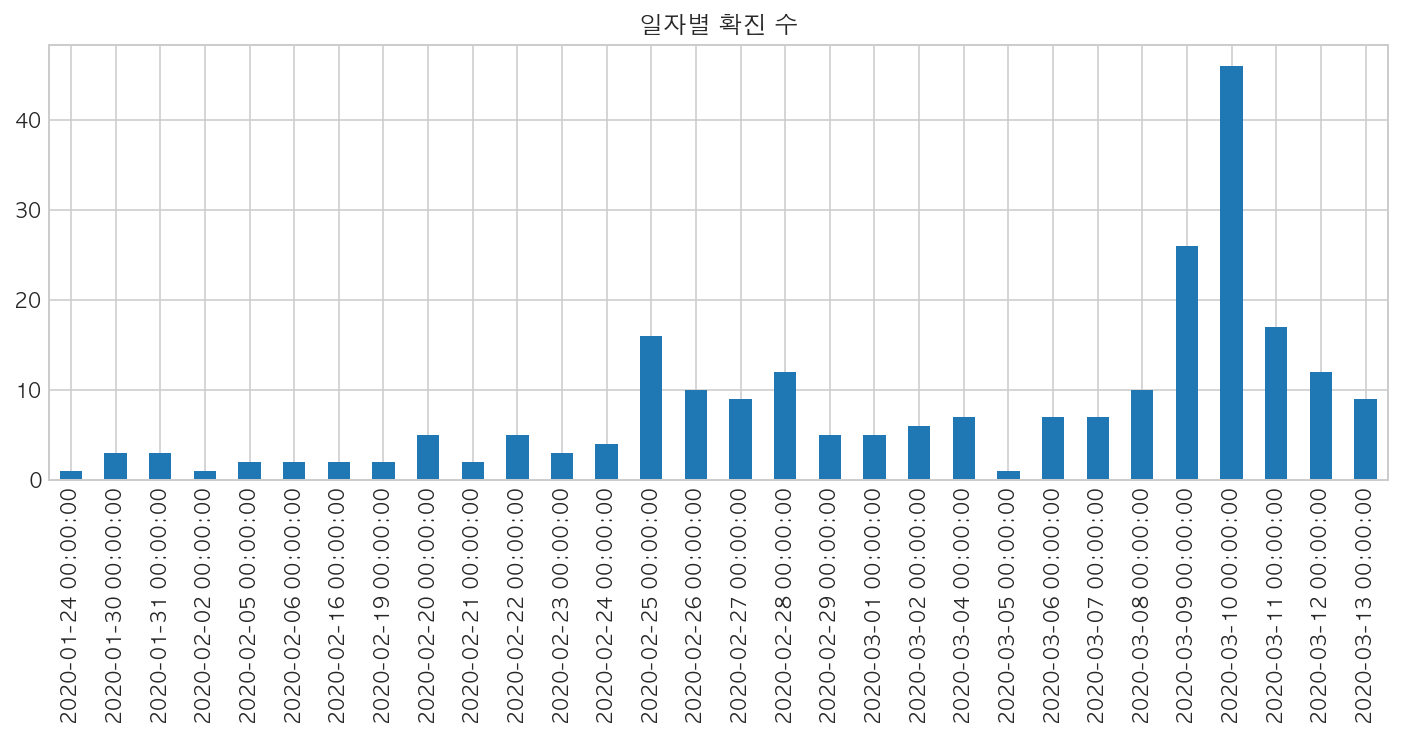

In [93]:
day_count[:30].plot.bar(figsize=(12, 4), title="일자별 확진 수")

In [112]:
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일, dtype: int64

In [119]:
last_day = df.iloc[0]["확진일"]
last_day

Timestamp('2021-12-26 00:00:00')

In [122]:
first_day = df.iloc[-1]["확진일"]
first_day

Timestamp('2020-01-24 00:00:00')

In [ ]:
all_day = pd.date_range(start=first_day, end=last_day)
all_day

In [ ]:
df_all_day = all_day.to_frame()
df_all_day[:2]

In [ ]:

df_all_day["확진수"] = day_count
df_all_day.head(2)

In [138]:
del df_all_day[0]

In [146]:
df_all_day["확진수"] = df_all_day["확진수"].fillna(0).astype(int)
df_all_day

,확진수
2020-01-24,1
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
...,...
2021-12-22,2719
2021-12-23,2346
2021-12-24,2123
2021-12-25,1917


<AxesSubplot:>

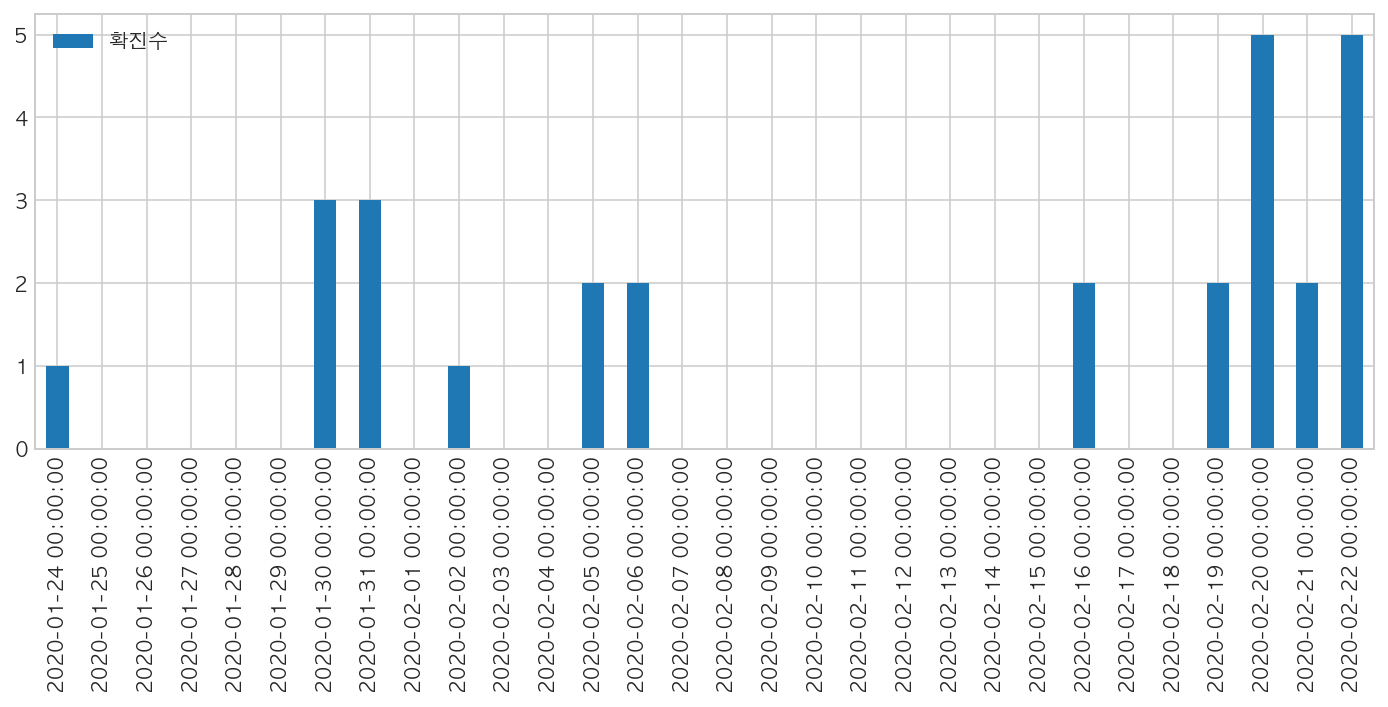

In [151]:
df_all_day[:30].plot.bar(figsize=(12, 4))

In [155]:
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum()
df_all_day.head(10)

,확진수,누적확진수
2020-01-24,1,1
2020-01-25,0,1
2020-01-26,0,1
2020-01-27,0,1
2020-01-28,0,1
2020-01-29,0,1
2020-01-30,3,4
2020-01-31,3,7
2020-02-01,0,7
2020-02-02,1,8


<AxesSubplot:>

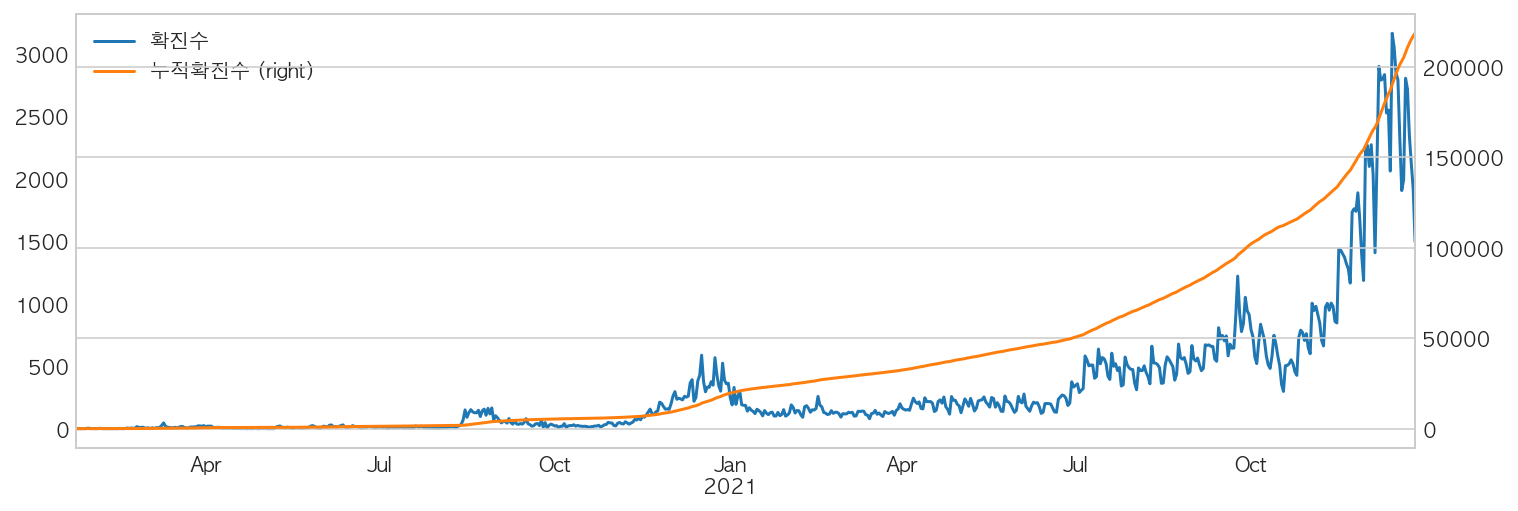

In [158]:
df_all_day.plot(figsize=(12, 4), secondary_y="누적확진수")

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

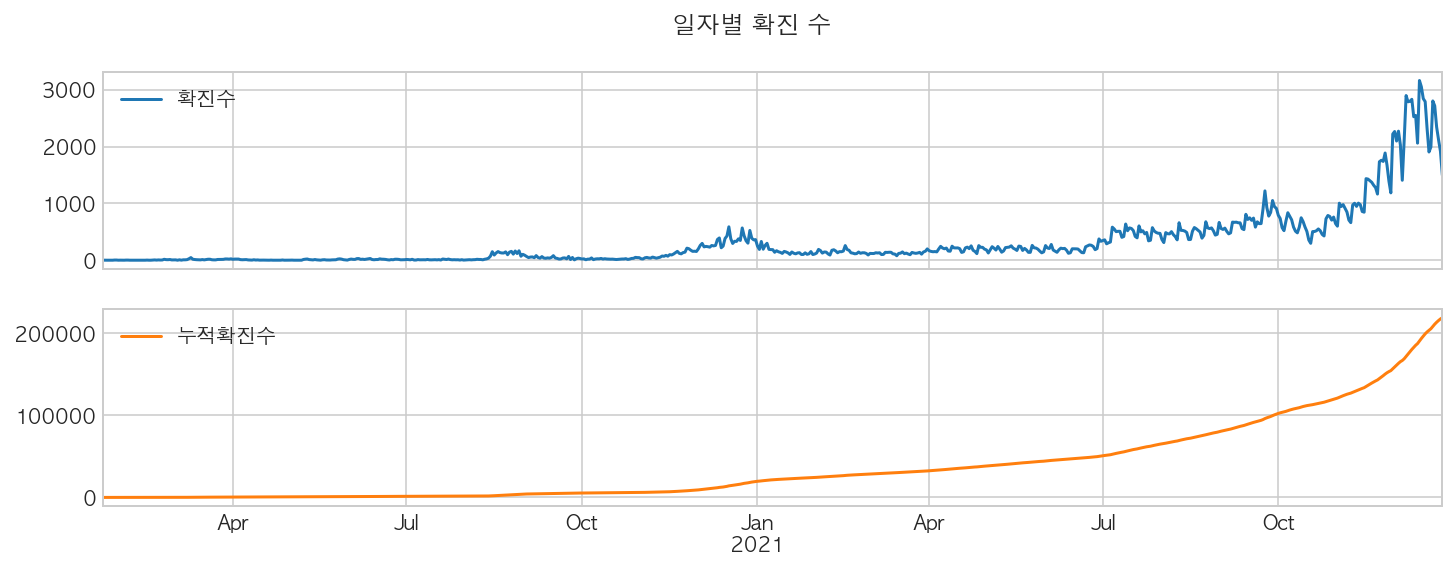

In [161]:
df_all_day.plot(figsize=(12, 4), subplots=True, title="일자별 확진 수")

In [164]:
df["거주지"].value_counts()

송파구     13235
강남구     12150
타시도     11320
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
동대문구     9091
강동구      8882
동작구      8558
중랑구      8236
서초구      8087
양천구      7709
마포구      7370
광진구      6819
도봉구      6501
강북구      6449
서대문구     5946
금천구      5635
성동구      5530
용산구      5137
기타       4995
종로구      3838
중구       3570
양천구         5
용산구         2
동작구         2
강동구         1
마포구         1
금천구         1
타시도         1
Name: 거주지, dtype: int64

In [165]:
df["거주구"] = df["거주지"]
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구


In [168]:

df["거주구"] = df["거주구"].str.strip()

In [171]:
df["거주구"] = df["거주구"].str.replace("타시도", "기타")

In [ ]:
gu_count = df["거주구"].value_counts()
gu_count

<AxesSubplot:title={'center':'구별 확진 수'}>

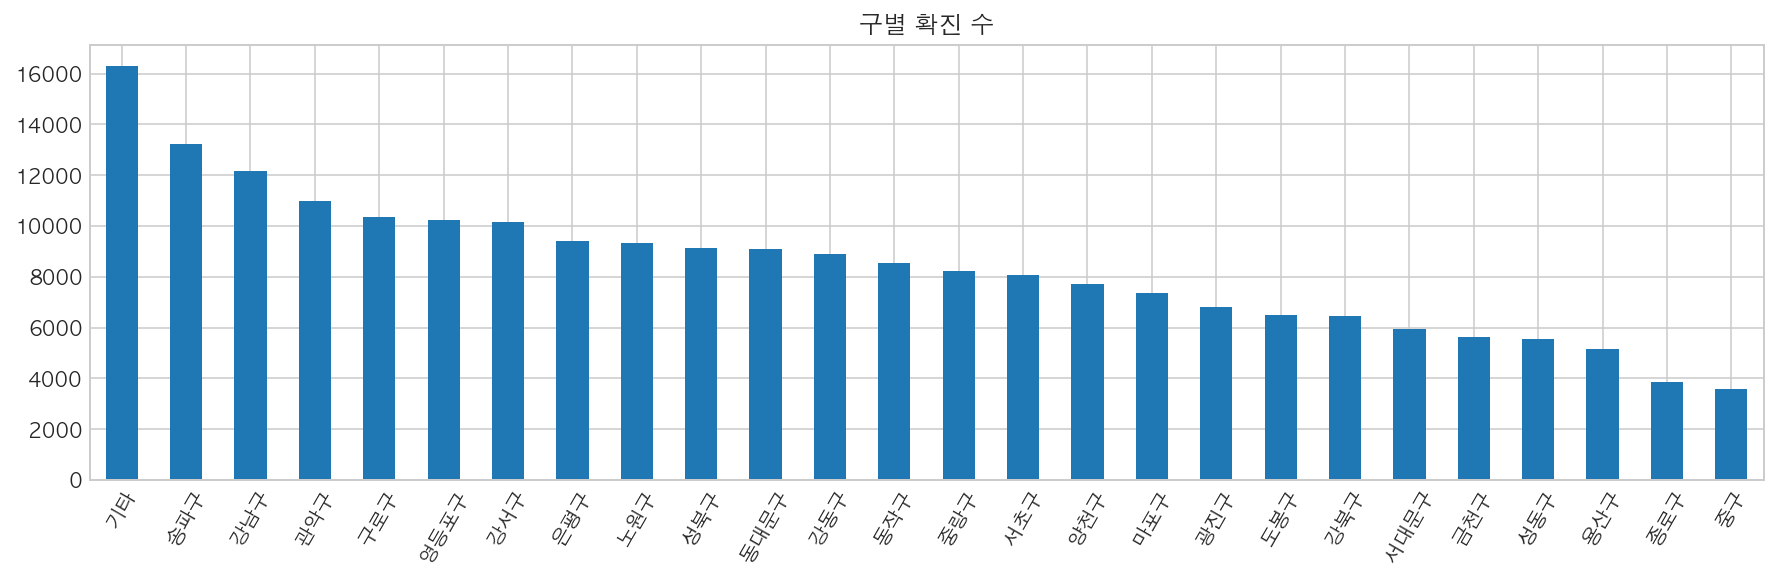

In [179]:
gu_count.plot(kind="bar", figsize=(15, 4), rot=60, title="구별 확진 수")

In [180]:
pd.crosstab(df["연도"], df["퇴원현황"])

퇴원현황,사망,퇴원
연도,,
2020,308,19085
2021,1340,142764


<AxesSubplot:xlabel='연도'>

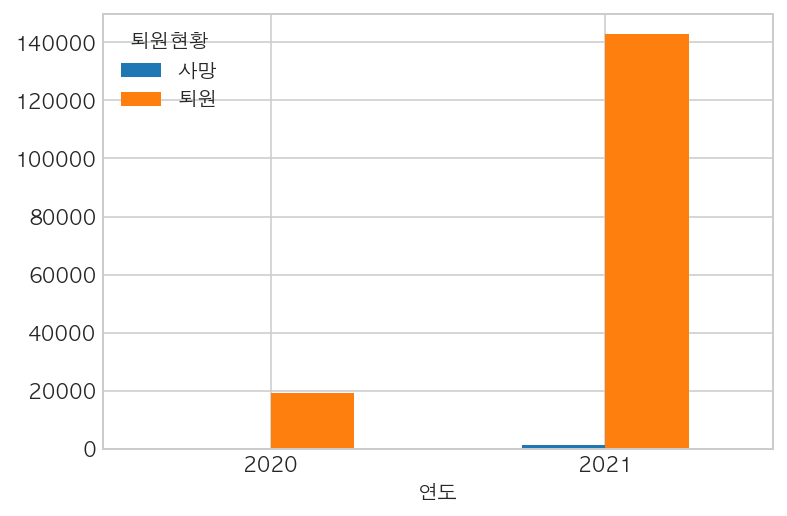

In [184]:
pd.crosstab(df["연도"], df["퇴원현황"]).plot.bar(rot=0)

In [188]:
pd.crosstab(df["연도"], df["퇴원현황"], normalize=True) * 100

퇴원현황,사망,퇴원
연도,,
2020,0.188383,11.672997
2021,0.819587,87.319033


In [190]:
ym = pd.crosstab(df["연도"], df["월"])
ym

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10432
2021,4878,4060,3897,5803,6030,6258,14504,15193,21382,18840,36267,62141


<AxesSubplot:xlabel='연도'>

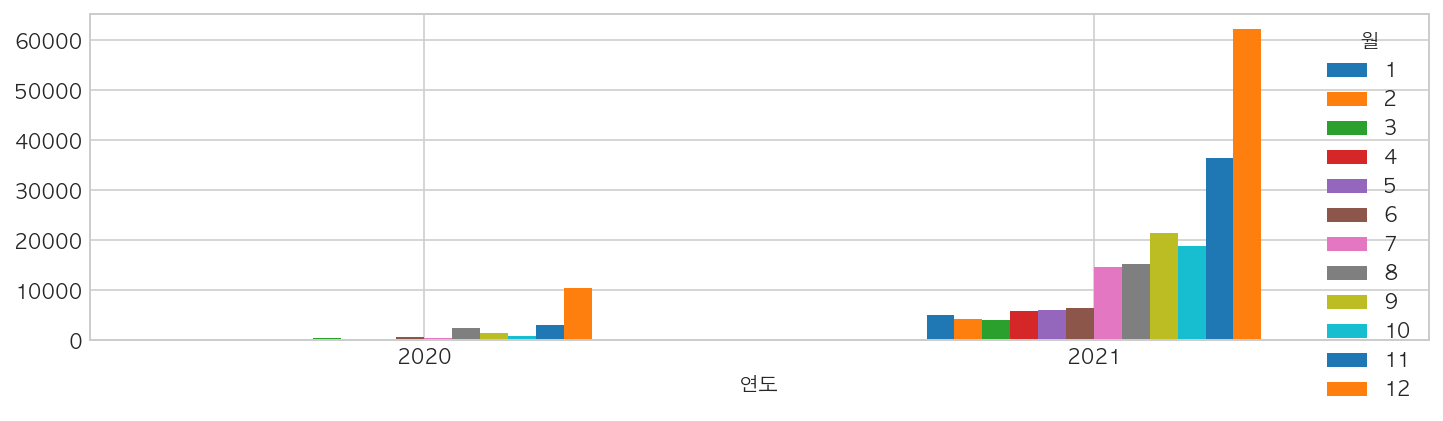

In [194]:
ym.plot.bar(rot=0, figsize=(12, 3))

<AxesSubplot:xlabel='월'>

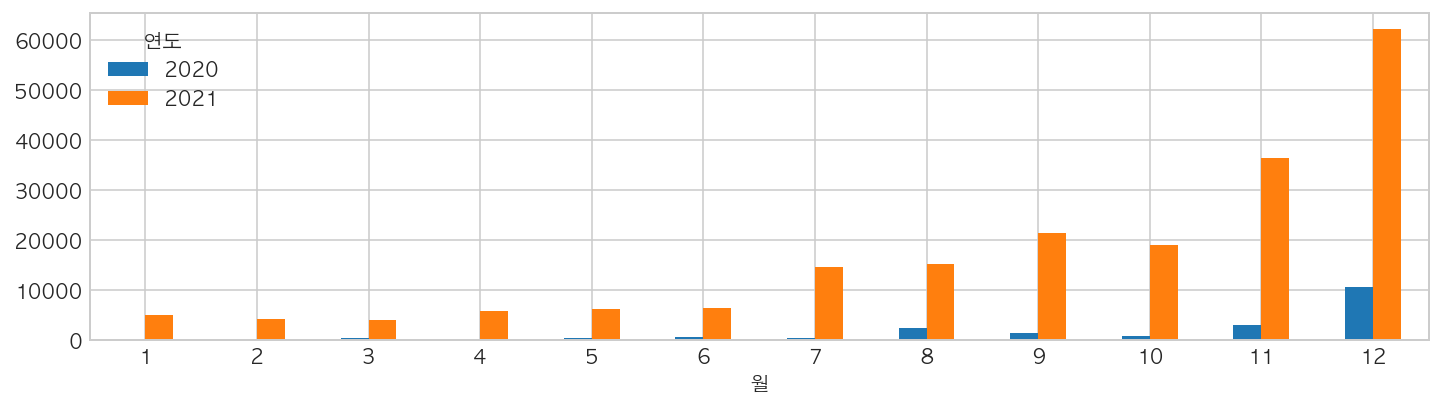

In [195]:
ym.T.plot.bar(rot=0, figsize=(12, 3))

In [197]:
ydow = pd.crosstab(df["연도"], df["요일"])
ydow

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


In [207]:
list("월화수목금토일")

['월', '화', '수', '목', '금', '토', '일']

In [201]:
weekday_list = [w for w in "월화수목금토일"]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [208]:
ydow.columns = list("월화수목금토일")
ydow

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


<AxesSubplot:>

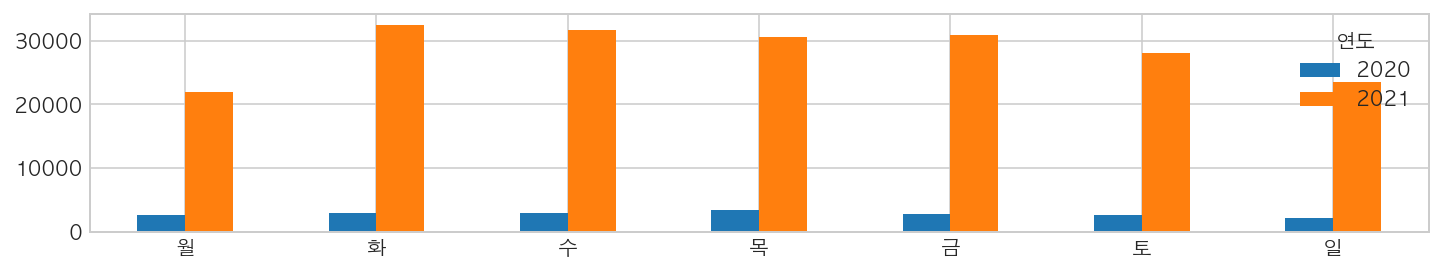

In [206]:
ydow.T.plot.bar(rot=0, figsize=(12, 2))

In [211]:
gu_m = pd.crosstab(df["거주구"], df["연도월"])
gu_m.iloc[:3, :7]

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
거주구,,,,,,,
강남구,0,7,34,23,11,8,15
강동구,0,4,6,3,11,11,14
강북구,0,0,5,0,9,10,4


In [214]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [216]:
gu_m.style.background_gradient(cmap="Oranges")

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
거주구,,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,227,118,240,428,529,792,1249,1287,1224,905,1286,2930
강동구,0,4,6,3,11,11,14,94,42,19,74,304,179,161,252,253,314,284,523,456,884,940,1582,2473
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,164,348,333,568,649,1162,1958
강서구,1,1,20,4,19,33,25,117,65,22,305,727,215,96,133,217,189,213,576,651,895,711,1771,3144
관악구,0,4,30,9,16,58,27,106,135,86,74,472,162,182,129,313,226,268,1133,1001,1064,802,1809,2886
광진구,0,1,5,2,6,3,5,74,34,11,43,277,120,155,253,238,215,236,468,531,891,485,985,1781
구로구,0,1,33,1,6,45,5,60,32,22,72,347,181,237,126,142,183,160,566,629,1424,1566,2021,2487
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,103,334,374,595,656,1179,1672
기타,0,10,22,13,12,25,12,175,128,82,204,1621,606,415,243,319,249,341,682,807,1206,1273,2549,5322


In [223]:

gu_m.T.style.background_gradient(cmap="Oranges_r")

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


In [ ]:

gu = (df["거주구"] == "강남구")
sun = (df["요일명"] == "일")
df[gu & sun]

In [239]:
df[gu & (df["여행력"] == "일본")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구,해외유입
31135,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구,감염경로 조사중
15746,52848,2020-12-23,강남구,일본,해외유입,퇴원,2020,12,23,2,2020-12,수,강남구,해외유입


In [240]:
df["접촉력_대문자"] = df["접촉력"].str.upper()

In [243]:
df.loc[df["접촉력_대문자"].str.contains("PC"), ["접촉력", "접촉력_대문자"]]

,접촉력,접촉력_대문자
연번,,
75267,용산구 소재 PC방 관련,용산구 소재 PC방 관련
74077,용산구 소재 PC방 관련,용산구 소재 PC방 관련
72912,용산구 소재 PC방 관련,용산구 소재 PC방 관련
72102,용산구 소재 PC방 관련,용산구 소재 PC방 관련
71923,용산구 소재 PC방 관련,용산구 소재 PC방 관련
...,...,...
134,동대문관련(교회pc방),동대문관련(교회PC방)
128,동대문관련(교회pc방),동대문관련(교회PC방)
127,동대문관련(교회pc방),동대문관련(교회PC방)


In [247]:

df.loc[df["거주구"].isin(["강남구", "서초구", "송파구"]), ["거주구", "접촉력"]]

,거주구,접촉력
연번,,
218644,송파구,감염경로 조사중
218643,송파구,감염경로 조사중
218642,송파구,감염경로 조사중
218641,송파구,감염경로 조사중
218640,송파구,감염경로 조사중
...,...,...
31,서초구,타시도 확진자 접촉
30,송파구,타시도 확진자 접촉
26,서초구,타시도 확진자 접촉


In [283]:
df["접촉력"] == "해외유입"

연번
218646    False
218645    False
218644    False
218643    False
218642    False
          ...  
5         False
4          True
3         False
2          True
1          True
Name: 접촉력, Length: 218646, dtype: bool

In [284]:
df["해외유입"] = df["접촉력"] == "해외유입"

In [288]:
df.loc[df["접촉력"] == "해외유입", "국내해외"] = "해외"
df.loc[df["접촉력"] != "해외유입", "국내해외"] = "국내"

In [257]:
df.loc[df["해외유입"], "국내해외"] = "해외"
df.loc[~df["해외유입"], "국내해외"] = "국내"
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자,해외유입,국내해외
연번,,,,,,,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,감염경로 조사중,False,국내
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,감염경로 조사중,False,국내


In [275]:
gu_oversea = pd.crosstab(df["거주구"], df["국내해외"])
gu_oversea.head(2)

국내해외,국내,해외
거주구,,
강남구,11920,230
강동구,8817,66


In [ ]:
pd.crosstab(df["거주구"], df["국내해외"], normalize=True).head(2)

In [293]:
gu_oversea = gu_oversea.loc[['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '기타']]

<AxesSubplot:xlabel='거주구'>

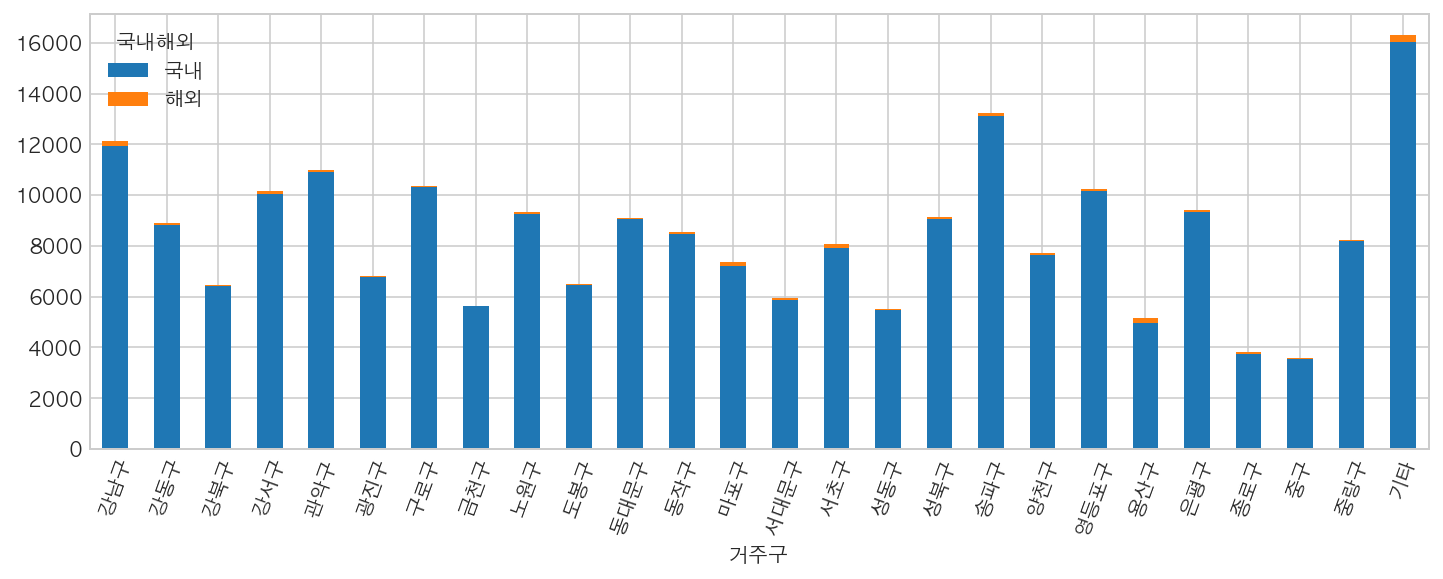

In [294]:
gu_oversea.plot.bar(stacked=True, figsize=(12, 4), rot=70)

In [ ]:
gu_over_count = pd.pivot_table(data=df, 
                               index="거주구", 
                               columns="국내해외", 
                               values="환자", 
                               aggfunc="count")
gu_over_count

In [ ]:
weekday_list = list("월화수목금토일")
gu_dow = pd.pivot_table(data=df, index="거주구", columns="요일명", 
               values="환자", aggfunc="count")
df_gu_weekday = gu_dow[weekday_list]
df_gu_weekday